In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import histplot

sns.set_style('darkgrid')

In [2]:
data = pd.read_csv("netflix.csv")
data.head(15)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,73424.0,17.617,8.306
6,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,395024.0,17.770,7.800
7,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,"['thriller', 'action', 'crime']",['US'],NaN,tt0066999,7.7,155051.0,12.817,7.500
8,tm119281,Bonnie and Clyde,MOVIE,"In the 1930s, bored waitress Bonnie Parker fal...",1967,R,110,"['crime', 'drama', 'action']",['US'],NaN,tt0061418,7.7,112048.0,15.687,7.500
9,tm98978,The Blue Lagoon,MOVIE,Two small children and a ship's cook survive a...,1980,R,104,"['romance', 'action', 'drama']",['US'],NaN,tt0080453,5.8,69844.0,50.324,6.156


In [3]:
data['age_certification'].value_counts()

age_certification
TV-MA    883
R        556
TV-14    474
PG-13    451
PG       233
TV-PG    188
G        124
TV-Y7    120
TV-Y     107
TV-G      79
NC-17     16
Name: count, dtype: int64

In [4]:
data['content_age'] = 2026 - data['release_year']

<Axes: xlabel='release-decade', ylabel='count'>

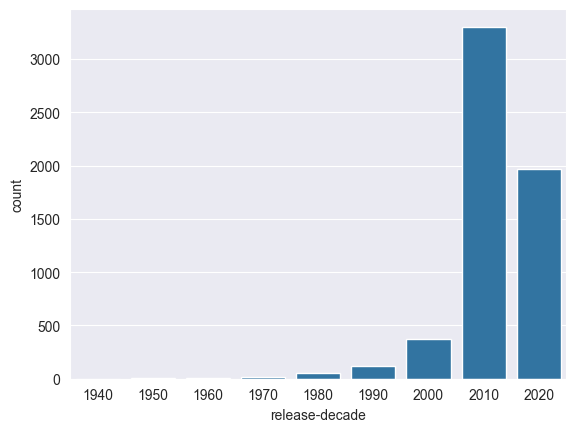

In [12]:
data['release-decade'] = (data['release_year']//10) * 10
sns.barplot(data['release-decade'].value_counts())

In [45]:
counts = data.groupby(['release_year', 'type']).size().unstack()
counts.fillna(0,inplace=True)
counts = counts.reset_index().copy()
counts

type,release_year,MOVIE,SHOW
0,1945,0.0,1.0
1,1954,2.0,0.0
2,1956,1.0,0.0
3,1958,1.0,0.0
4,1959,1.0,0.0
...,...,...,...
58,2018,473.0,300.0
59,2019,525.0,311.0
60,2020,500.0,314.0
61,2021,473.0,314.0


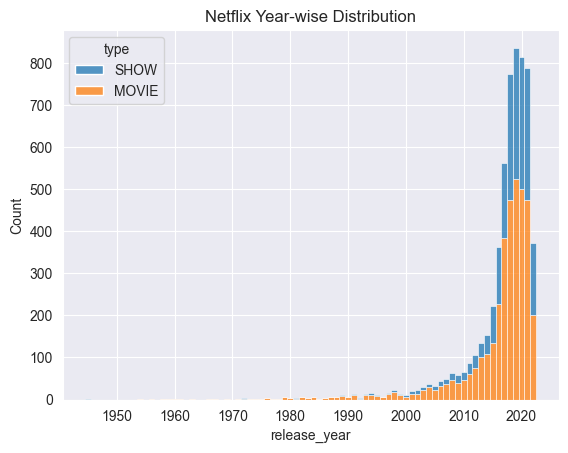

In [42]:
sns.histplot(data=data, x='release_year', hue='type', multiple='stack', discrete=True)
plt.title("Netflix Year-wise Distribution")
plt.show()

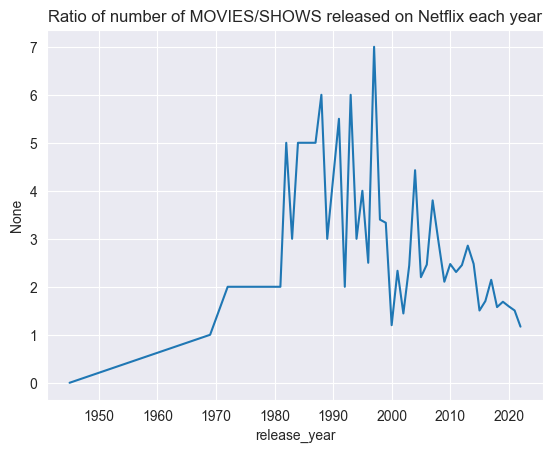

In [44]:
sns.lineplot(x='release_year', y=counts['MOVIE']/counts['SHOW'], data=counts)
plt.title("Ratio of number of MOVIES/SHOWS released on Netflix each year")
plt.show()